In [49]:
%matplotlib inline
import pandas as pd


tripsDataFile = '../201402_Trips_WithBicycleDistanceSpeed.csv'

trips = pd.DataFrame.from_csv(tripsDataFile)
trips = trips[(trips['Duration'] <= 5400) & (trips['Duration'] > 60)]


In [50]:

import datetime as datetime

# def groupByHour(starttime):
#     startdatetime = datetime.datetime.strptime(starttime, '%m/%d/%Y %H:%M')
#     return startdatetime.hour


def groupByHour(starttime):
    timestamp = datetime.datetime.strptime(starttime, '%m/%d/%Y %H:%M')
    year = timestamp.year
    month = timestamp.month
    day = timestamp.day
    hour = timestamp.hour
    return datetime.datetime(year, month, day, hour, 0)

In [51]:

trips['starthour']=trips['Start Date'].map(groupByHour)
tripStationHours=trips[['startStationId', 'starthour']].reset_index()

tripStationHourCounts = tripStationHours.groupby(['startStationId', 'starthour'])['Trip ID'].count().reset_index(name="startTripCount")
# tripStationHourCounts

In [52]:
topStationsByCounts=[70,50,60,77,55,69,61]
topStationsByCounts

[70, 50, 60, 77, 55, 69, 61]

In [53]:
tripStationHourCounts=tripStationHourCounts.loc[tripStationHourCounts['startStationId'].isin(topStationsByCounts)]

In [54]:
tripStationHourCounts['startStationId'].unique()

tripStationHourCounts['hour']=tripStationHourCounts['starthour'].map(lambda x: x.hour)
tripStationHourCounts['weekday'] = tripStationHourCounts['starthour'].apply(lambda x: x.weekday())

tripStationHourCounts.to_csv('./hourlyPatterns/201402_TopStationHourlyCounts.csv',index=False)

In [60]:

topStationHourlyCounts = pd.DataFrame.from_csv('./hourlyPatterns/201402_TopStationHourlyCounts.csv')
topStationHourlyCounts
topStationHourlyCounts =topStationHourlyCounts[topStationHourlyCounts.apply(lambda x: x['hour'] == 12, axis=1)]
topStationHourlyCounts


topStationHourlyCounts = topStationHourlyCounts[(topStationHourlyCounts['weekday'] < 5 )]
topStationHourlyCounts
# topStationHourlyCounts =topStationHourlyCounts[topStationHourlyCounts.apply(lambda x: x['starthour'].weekday(), axis=1)]


,starthour,startTripCount,hour,weekday
startStationId,,,,
50,2013-08-29 12:00:00,10,12,3
50,2013-08-30 12:00:00,9,12,4
50,2013-09-02 12:00:00,9,12,0
50,2013-09-03 12:00:00,2,12,1
50,2013-09-04 12:00:00,2,12,2
50,2013-09-06 12:00:00,1,12,4
50,2013-09-09 12:00:00,3,12,0
50,2013-09-10 12:00:00,2,12,1
50,2013-09-11 12:00:00,4,12,2


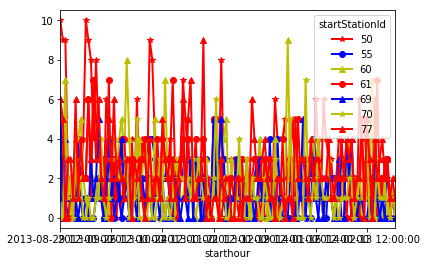

In [61]:


topStationHourlyCounts=topStationHourlyCounts.reset_index()
topStationHourlyCounts
topStationHourlyCounts=topStationHourlyCounts.pivot(index='starthour', columns='startStationId', values='startTripCount')
topStationHourlyCounts=topStationHourlyCounts.fillna(0)
topStationHourlyCounts

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# plot = topStationHourlyCounts.plot(x='starthour', kind='bar',title='topStationCountsOverTime')
# matplotlib.style.use('ggplot')
# plot=topStationHourlyCounts.plot()
# fig = plot.get_figure()
# fig.savefig("./hourlyPatterns/topStationCountsOverTime.png")

topStationHourlyCounts.plot(style=['r*-','bo-','y^-','ro-','b^-','y*-','r^-'], linewidth=2.0, kind='line')

In [63]:
# topStationHourlyCounts
topStationHourlyCounts.to_csv('./hourlyPatterns/201402_TopStation_Weekday_12Count.csv',index=True)


startStationId,50,55,60,61,69,70,77
starthour,,,,,,,
2013-08-29 12:00:00,10.0,1.0,3.0,3.0,6.0,0.0,6.0
2013-08-30 12:00:00,9.0,4.0,3.0,3.0,0.0,0.0,5.0
2013-09-02 12:00:00,9.0,1.0,7.0,0.0,4.0,5.0,0.0
2013-09-03 12:00:00,2.0,0.0,1.0,0.0,1.0,1.0,3.0
2013-09-04 12:00:00,2.0,0.0,0.0,1.0,1.0,2.0,3.0
2013-09-05 12:00:00,0.0,0.0,2.0,2.0,1.0,0.0,1.0
2013-09-06 12:00:00,1.0,0.0,4.0,1.0,1.0,3.0,6.0
2013-09-09 12:00:00,3.0,4.0,4.0,1.0,0.0,1.0,1.0
2013-09-10 12:00:00,2.0,1.0,5.0,2.0,1.0,2.0,4.0
